# **Proyecto SQL**

El coronavirus tomó al mundo entero por sorpresa, cambiando la rutina diaria de todos y todas. Los habitantes de las ciudades ya no pasaban su tiempo libre fuera, yendo a cafés y centros comerciales; sino que más gente se quedaba en casa, leyendo libros. Eso atrajo la atención de las startups (empresas emergentes) que se apresuraron a desarrollar nuevas aplicaciones para los amantes de los libros.
Te han dado una base de datos de uno de los servicios que compiten en este mercado. Contiene datos sobre libros, editoriales, autores y calificaciones de clientes y reseñas de libros. Esta información se utilizará para generar una propuesta de valor para un nuevo producto.

# **Descripción de los datos**

## **books:**

Contiene datos sobre libros:
- book_id — identificación del libro
- author_id — identificación del autor o autora
- title — título
- num_pages — número de páginas
- publication_date — fecha de la publicación
- publisher_id — identificación de la editorial

## **authors:**
Contiene datos sobre autores:
- author_id — identificación del autor o autora
- author — el autor o la autora


## **publishers:**
Contiene datos sobre editoriales:
- publisher_id — identificación de la editorial
- publisher — la editorial


## **ratings:**
Contiene datos sobre las calificaciones de usuarios:
- rating_id — identificación de la calificación
- book_id — identificación del libro
- username — el nombre del usuario que revisó el libro
- rating — calificación


## **reviews:**
Contiene datos sobre las reseñas de los y las clientes:

- review_id — identificación de la reseña
- book_id — identificación del libro
- username — el nombre del usuario que revisó el libro
- text — el texto de la reseña


# **Diagrama de datos**

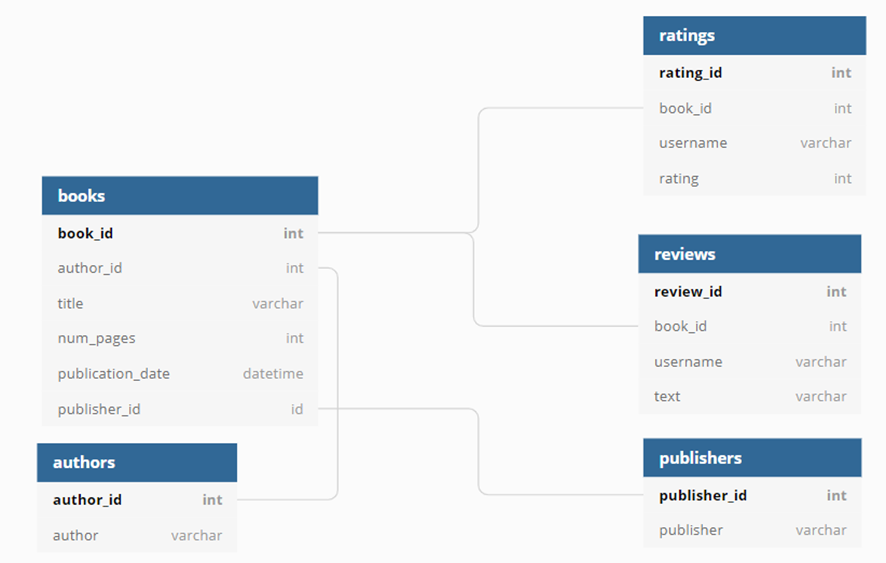

<div class="alert alert-block alert-success">
<b>Comentario del revisor (1ra Iteracion)</b> <a class=“tocSkip”></a>

Buen detalle el incluir la imagen de las relaciones entre las tablas, así es más fácil el entender los JOIN que se realicen a lo largo del proyecto
</div>

# **Ejercicio:**
- Encuentra el número de libros publicados después del 1 de enero de 2000.
- Encuentra el número de reseñas de usuarios y la calificación promedio para cada libro.
- Identifica la editorial que ha publicado el mayor número de libros con más de 50 páginas (esto te ayudará a excluir folletos y publicaciones similares de tu análisis).
- Identifica al autor que tiene la más alta calificación promedio del libro: mira solo los libros con al menos 50 calificaciones.
- Encuentra el número promedio de reseñas de texto entre los usuarios que calificaron más de 50 libros.


# **Instrucciones para completar la tarea:**
- Describe los objetivos del estudio.
- Estudia las tablas (imprime las primeras filas).
- Realiza una consulta SQL para cada una de las tareas.
- Genera los resultados de cada consulta en el Notebook.


## **Describe los objetivos del estudio.**

El objetivo central del estudio es analizar los datos proporcionados para desarrollar una propuesta de valor de un nuevo producto en el mercado de aplicaciones para lectores. Dicho análisis permitirá entender mejor las preferencias y comportamientos de los usuarios, así como las características de los libros que son mejor valorados. Alguno objetivos clave podrían ser:

1. Ver cuáles son las preferencias de los lectores y entenderlas mejor.
2. Ver el comportamiento del mercado. Segmentarlo y clasificarlo.
3. Ver cual es el desempeño de los autores en función de las reseñas.
4. Identificar oportunidades en el Mercado.
5. Resumir ideas que potencien la propuesta del negocio.

Todo lo anterior se hace en función de tener claro como se mueve el mercado, el gusto de los lectores, y crear ideas claves que contribuyan a mejorar continuamente la aplicación para establecerse fuertemente en el mercado.

## **Importe de librerías y conexión a la base de datos**

In [42]:
# Importar librerías
import pandas as pd
from sqlalchemy import create_engine

# Conexión a la base de datos:
db_config = {'user': 'practicum_student', # nombre de usuario
'pwd': 's65BlTKV3faNIGhmvJVzOqhs', # contraseña
'host': 'rc1b-wcoijxj3yxfsf3fs.mdb.yandexcloud.net',
'port': 6432, # puerto de conexión
'db': 'data-analyst-final-project-db'} # nombre de la base de datos
connection_string = 'postgresql://{}:{}@{}:{}/{}'.format(db_config['user'],
db_config['pwd'],
db_config['host'],
db_config['port'],
db_config['db'])


engine = create_engine(connection_string, connect_args={'sslmode':'require'})

## **Estudia las tablas (imprime las primeras filas).**

### books:

In [43]:
# Query de la información almacenada en books:
query_books = """
SELECT * FROM books
"""

# Creación de un Dataframe para leer la consulta:
df_books = pd.io.sql.read_sql(query_books, con = engine)
display(df_books.head())

,book_id,author_id,title,num_pages,publication_date,publisher_id
0,1,546,'Salem's Lot,594,2005-11-01,93
1,2,465,1 000 Places to See Before You Die,992,2003-05-22,336
2,3,407,13 Little Blue Envelopes (Little Blue Envelope...,322,2010-12-21,135
3,4,82,1491: New Revelations of the Americas Before C...,541,2006-10-10,309
4,5,125,1776,386,2006-07-04,268


### authors:

In [44]:
# Query de la información almacenada en authors:
query_authors = """
SELECT * FROM authors
"""

# Creación de un Dataframe para leer la consulta:
df_authors = pd.io.sql.read_sql(query_authors, con = engine)
display(df_authors.head())

,author_id,author
0,1,A.S. Byatt
1,2,Aesop/Laura Harris/Laura Gibbs
2,3,Agatha Christie
3,4,Alan Brennert
4,5,Alan Moore/David Lloyd


### publishers:

In [45]:
# Query de la información almacenada en publishers:
query_publishers = """
SELECT * FROM publishers
"""

# Creación de un Dataframe para leer la consulta:
df_publishers = pd.io.sql.read_sql(query_publishers, con = engine)
display(df_publishers.head())

,publisher_id,publisher
0,1,Ace
1,2,Ace Book
2,3,Ace Books
3,4,Ace Hardcover
4,5,Addison Wesley Publishing Company


### ratings:

In [46]:
# Query de la información almacenada en ratings:
query_ratings = """
SELECT * FROM ratings
"""

# Creación de un Dataframe para leer la consulta:
df_ratings = pd.io.sql.read_sql(query_ratings, con = engine)
display(df_ratings.head())

,rating_id,book_id,username,rating
0,1,1,ryanfranco,4
1,2,1,grantpatricia,2
2,3,1,brandtandrea,5
3,4,2,lorichen,3
4,5,2,mariokeller,2


### reviews:

In [47]:
# Query de la información almacenada en reviews:
query_reviews = """
SELECT * FROM reviews
"""

# Creación de un Dataframe para leer la consulta:
df_reviews = pd.io.sql.read_sql(query_reviews, con = engine)
display(df_reviews.head())

,review_id,book_id,username,text
0,1,1,brandtandrea,Mention society tell send professor analysis. ...
1,2,1,ryanfranco,Foot glass pretty audience hit themselves. Amo...
2,3,2,lorichen,Listen treat keep worry. Miss husband tax but ...
3,4,3,johnsonamanda,Finally month interesting blue could nature cu...
4,5,3,scotttamara,Nation purpose heavy give wait song will. List...


## Encuentra el número de libros publicados después del 1 de enero de 2000.

In [48]:
df_books.head(10)

,book_id,author_id,title,num_pages,publication_date,publisher_id
0,1,546,'Salem's Lot,594,2005-11-01,93
1,2,465,1 000 Places to See Before You Die,992,2003-05-22,336
2,3,407,13 Little Blue Envelopes (Little Blue Envelope...,322,2010-12-21,135
3,4,82,1491: New Revelations of the Americas Before C...,541,2006-10-10,309
4,5,125,1776,386,2006-07-04,268
5,6,257,1st to Die (Women's Murder Club #1),424,2005-05-20,116
6,7,258,2nd Chance (Women's Murder Club #2),400,2005-05-20,116
7,8,260,4th of July (Women's Murder Club #4),448,2006-06-01,318
8,9,563,A Beautiful Mind,461,2002-02-04,104
9,10,445,A Bend in the Road,341,2005-04-01,116


<div class="alert alert-block alert-success">
<b>Comentario del revisor (1ra Iteracion)</b> <a class=“tocSkip”></a>

Buen trabajo mostrando los datos de cada tabla
</div>

b

In [49]:
books_after_2000 = """
SELECT COUNT(book_id) as total_books
FROM books
WHERE publication_date > '2000-01-01'
"""

df_books_after_2000 = pd.io.sql.read_sql(books_after_2000, con = engine)
print(df_books_after_2000)

   total_books
0          819


El número de libros publicados después del primero de enero del 2000 es de 819 libros

<div class="alert alert-block alert-success">
<b>Comentario del revisor (1ra Iteracion)</b> <a class=“tocSkip”></a>

Buen trabajo con el cálculo!
</div>

## Encuentra el número de reseñas de usuarios y la calificación promedio para cada libro.

In [50]:
reviews_and_ratings = """
SELECT 
bks.book_id,
bks.title,
COUNT(rev.review_id) AS total_users_reviews,
AVG(rat.rating) AS avg_rating
FROM books AS bks
LEFT JOIN
reviews AS rev
ON bks.book_id = rev.book_id
LEFT JOIN ratings AS rat 
ON rev.book_id = rat.book_id
GROUP BY bks.book_id, bks.title
ORDER BY bks.book_id;
"""

df_reviews_ratings = pd.io.sql.read_sql(reviews_and_ratings, con = engine)
display(df_reviews_ratings)

,book_id,title,total_users_reviews,avg_rating
0,1,'Salem's Lot,6,3.666667
1,2,1 000 Places to See Before You Die,2,2.500000
2,3,13 Little Blue Envelopes (Little Blue Envelope...,9,4.666667
3,4,1491: New Revelations of the Americas Before C...,4,4.500000
4,5,1776,24,4.000000
...,...,...,...,...
995,996,Wyrd Sisters (Discworld #6; Witches #2),9,3.666667
996,997,Xenocide (Ender's Saga #3),15,3.400000
997,998,Year of Wonders,20,3.200000
998,999,You Suck (A Love Story #2),4,4.500000


El listado anterior contiene el número de reseñas por libro y las calificaciones promedio por libro.

<div class="alert alert-block alert-success">
<b>Comentario del revisor (1ra Iteracion)</b> <a class=“tocSkip”></a>

Correcto, bien aplicado el JOIN
</div>

## Identifica la editorial que ha publicado el mayor número de libros con más de 50 páginas (esto te ayudará a excluir folletos y publicaciones similares de tu análisis).

In [51]:
most_published = """
SELECT
pub.publisher_id AS publisher_id,
pub.publisher AS publisher,
COUNT(bks.book_id) AS number_of_books_more_than_50_pages
FROM publishers AS pub
LEFT JOIN books AS bks
ON pub.publisher_id = bks.publisher_id
WHERE bks.num_pages> 50
GROUP BY pub.publisher_id, pub.publisher
ORDER BY number_of_books_more_than_50_pages DESC
LIMIT 1;
"""

df_most_published = pd.io.sql.read_sql(most_published, con = engine)
display(df_most_published)

,publisher_id,publisher,number_of_books_more_than_50_pages
0,212,Penguin Books,42


Penguin Books es la editorial que más libros publicó con páginas por libro superiores a 50 páginas. En total publicaron 42 libros con más de 50 páginas.

<div class="alert alert-block alert-success">
<b>Comentario del revisor (1ra Iteracion)</b> <a class=“tocSkip”></a>

Perfecto!
</div>

## Identifica al autor que tiene la más alta calificación promedio del libro: mira solo los libros con al menos 50 calificaciones.

In [52]:
best_rated_author = """
SELECT
aut.author AS author,
AVG(rat.rating) AS avg_rating,
COUNT(rat.rating_id) AS number_of_ratings
FROM books AS bks
LEFT JOIN authors AS aut
ON bks.author_id = aut.author_id
LEFT JOIN ratings AS rat
ON bks.book_id = rat.book_id
WHERE bks.book_id IN
(SELECT
book_id
FROM
ratings
GROUP BY book_id
HAVING COUNT(book_id) >= 50)
GROUP BY aut.author
ORDER BY avg_rating DESC
LIMIT 1;
"""

df_best_rated_author = pd.io.sql.read_sql(best_rated_author, con = engine)
display(df_best_rated_author)

,author,avg_rating,number_of_ratings
0,J.K. Rowling/Mary GrandPré,4.287097,310


En este caso los autores con mejor calificación promedio de los lectores fueron J.K. Rowling/Mary GrandPré, con una calificación promedio de 4.287097 y un número de 310 calificaciones.

<div class="alert alert-block alert-danger">
<b>Comentario del revisor (1ra Iteracion)</b> <a class=“tocSkip”></a>

Te recomiendo que primero realices una subconsulta donde calcules la cantidad de calificaciones de los libros y luego hagas el JOIN escogiendo solo los libros que tienen más de 50, puede que parezca muy similar a lo que ya estás haciendo pero con la subconsulta tienes una mejor precisión al momento de aplicar el filtrado
</div>

<div class="alert alert-block alert-info">
<b>Respuesta del estudiante</b> <a class=“tocSkip”></a>
Se hace la corrección al query best_rated_author. Se agrega una subconsulta que es ejecutada a través de la cláusula `WHERE bks.book_id IN`
</div>

<div class="alert alert-block alert-success">
<b>Comentario del revisor (2da Iteracion)</b> <a class=“tocSkip”></a>

Buen trabajo con la corrección! 
</div>

## Encuentra el número promedio de reseñas de texto entre los usuarios que calificaron más de 50 libros.

In [53]:
avg_text_reviews = """
WITH more_than_50_ratings AS (
    SELECT 
        rat.username
    FROM 
        ratings AS rat
    GROUP BY 
        rat.username
    HAVING 
        COUNT(rat.book_id) > 50
),
number_of_reviews AS (
    SELECT 
        mor.username,
        COUNT(rev.review_id) AS num_reviews
    FROM 
        more_than_50_ratings AS mor
    JOIN 
        reviews AS rev ON mor.username = rev.username
    GROUP BY 
        mor.username
)
SELECT 
    AVG(num_reviews) AS avg_reviews
FROM 
    number_of_reviews;
"""

df_avg_text_reviews = pd.io.sql.read_sql(avg_text_reviews, con = engine)
display(df_avg_text_reviews)

,avg_reviews
0,24.333333


El número promedio de reseñas de texto entre los usuarios que hicieron más de 50 calificaciones es de 24.33 reseñas.

<div class="alert alert-block alert-success">
<b>Comentario del revisor (1ra Iteracion)</b> <a class=“tocSkip”></a>

Correcto! Muy buen trabajo
</div>

<div class="alert alert-block alert-info">
<b>Comentario del revisor (1ra Iteracion)</b> <a class=“tocSkip”></a>

Hiciste un buen trabajo Christian! Lograste hacer los JOIN y ejecutar las operaciones necesarias para mostrar los datos requeridos.
    
Hay una consulta que no es del todo correcta y tiene oportunidad de mejora por lo que te dejé un comentario para que puedas corregirla.

SQL es un lenguaje que usarás en tu día a día como analista de datos, por lo que te recomiendo explorar y prácticar más sobre el mismo ya que realizar queries correctas será vital en un entorno laboral para garantizar la calidad de tus análisis.
    
Saludos!
</div>